<a href="https://colab.research.google.com/github/BrokeLuver/Diabetes-Risk-Predictor-ML/blob/main/Diabetes_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание риска диабета на основе медицинских показателей


#### Написано Верещако Д.В. и не является медицинским инструментом, выполнено в учебных целях!!!

### Импорт библиотек

In [63]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

### Анализ датасета

In [64]:
diabetes = fetch_openml(name='diabetes', as_frame=True, version=1)
print(diabetes.DESCR)

**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., &
        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
  

In [65]:
df = diabetes.frame
X = diabetes.data
y = diabetes.target

In [66]:
print("Размер данных:", X.shape, y.shape)

Размер данных: (768, 8) (768,)


In [67]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [68]:
print("Распределение классов:\n", y.value_counts())

Распределение классов:
 class
tested_negative    500
tested_positive    268
Name: count, dtype: int64


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [70]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: class
Non-Null Count  Dtype   
--------------  -----   
768 non-null    category
dtypes: category(1)
memory usage: 1.0 KB


### Преподбработка данных

In [71]:
# Замена нулей на NaN в конкретных столбцах
cols_to_fix = ['plas', 'pres', 'skin', 'insu', 'mass']
df[cols_to_fix] = df[cols_to_fix].replace(0, float('nan'))

In [72]:
# Разделение на признаки и целевую переменную
X = df.drop('class', axis=1)
y = df['class']

In [73]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Обработка пропусков и масштабирование
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [75]:
X_train_imp = imputer.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imp)

In [76]:
X_test_imp = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imp)

### Обучение моделей и выбор лучшей

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
# Базовая модель
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Оценка базовой модели
y_pred_base = base_model.predict(X_test_scaled)
print("Базовая модель:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.2f}")
print(classification_report(y_test, y_pred_base))

Базовая модель:
Accuracy: 0.74
                 precision    recall  f1-score   support

tested_negative       0.82      0.77      0.79        99
tested_positive       0.62      0.69      0.66        55

       accuracy                           0.74       154
      macro avg       0.72      0.73      0.72       154
   weighted avg       0.75      0.74      0.74       154



In [80]:
joblib.dump(base_model, 'diabetes_model_base.pkl')

['diabetes_model_base.pkl']

In [81]:
# Подбор гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("\nЛучшие параметры:", grid_search.best_params_)
print("Лучшая точность при кросс-валидации: {:.2f}".format(grid_search.best_score_))


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Лучшая точность при кросс-валидации: 0.78


In [82]:
# Используем лучшую модель
model = grid_search.best_estimator_

In [83]:
# Предсказание и оценка улучшенной модели
y_pred = model.predict(X_test_scaled)
print("\nУлучшенная модель:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Улучшенная модель:
Accuracy: 0.77
                 precision    recall  f1-score   support

tested_negative       0.83      0.82      0.82        99
tested_positive       0.68      0.69      0.68        55

       accuracy                           0.77       154
      macro avg       0.75      0.75      0.75       154
   weighted avg       0.77      0.77      0.77       154



In [84]:
# Сохранение улучшенной модели
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

### Сохранение данных для использования в веб-программе

In [85]:
# Сохраняем всё, что нужно для предобработки и предсказания
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Код для построения графиков

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

In [87]:
# Преобразуем строковые метки в числовые
y_train_numeric = (y_train == 'tested_positive').astype(int)
y_test_numeric = (y_test == 'tested_positive').astype(int)
y_pred_numeric = (y_pred == 'tested_positive').astype(int)

In [88]:
# 1. ROC-кривая
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая модели')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc


In [89]:
# 2. Кривая Precision-Recall
def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba, pos_label=1)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR кривая (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall кривая модели')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

    return pr_auc

In [90]:
# 3. Важность признаков
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 8))
        plt.title('Важность признаков в модели')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Выводим важность признаков в виде таблицы
        print("\nВажность признаков:")
        for i, idx in enumerate(indices):
            print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")
    else:
        print("Модель не имеет атрибута feature_importances_")

In [91]:
# 4. Распределение предсказанных вероятностей
def plot_probability_distribution(y_true, y_pred_proba):
    plt.figure(figsize=(10, 6))

    # Вероятности для класса 1 (диабет)
    proba_diabetes = y_pred_proba

    # Разделяем по классам
    proba_class0 = proba_diabetes[y_true == 0]
    proba_class1 = proba_diabetes[y_true == 1]

    plt.hist(proba_class0, alpha=0.7, bins=30, label='Нет диабета', color='green')
    plt.hist(proba_class1, alpha=0.7, bins=30, label='Есть диабет', color='red')

    plt.xlabel('Вероятность диабета')
    plt.ylabel('Частота')
    plt.title('Распределение предсказанных вероятностей')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [92]:
# 5. Визуализация правильных и неправильных предсказаний
def plot_prediction_analysis(y_true, y_pred):
    # Создаем массив, указывающий на правильность предсказания
    correct = (y_true == y_pred)

    plt.figure(figsize=(12, 8))

    # Подграфик 1: Общее распределение правильных/неправильных предсказаний
    plt.subplot(2, 1, 1)
    correct_count = np.sum(correct)
    incorrect_count = len(correct) - correct_count

    bars = plt.bar(['Правильные', 'Неправильные'], [correct_count, incorrect_count],
                   color=['green', 'red'], alpha=0.7)
    plt.title('Общее распределение предсказаний')
    plt.ylabel('Количество')

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')

    # Подграфик 2: Детальный анализ по классам
    plt.subplot(2, 1, 2)

    # Считаем TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    values = [tn, fp, fn, tp]
    colors = ['green', 'orange', 'red', 'blue']

    bars = plt.bar(categories, values, color=colors, alpha=0.7)
    plt.title('Детальный анализ предсказаний по классам')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('prediction_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Выводим метрики
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\nДетальные метрики:")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP): {tp}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")

In [93]:
# Получаем предсказания вероятностей
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

### Графики модели

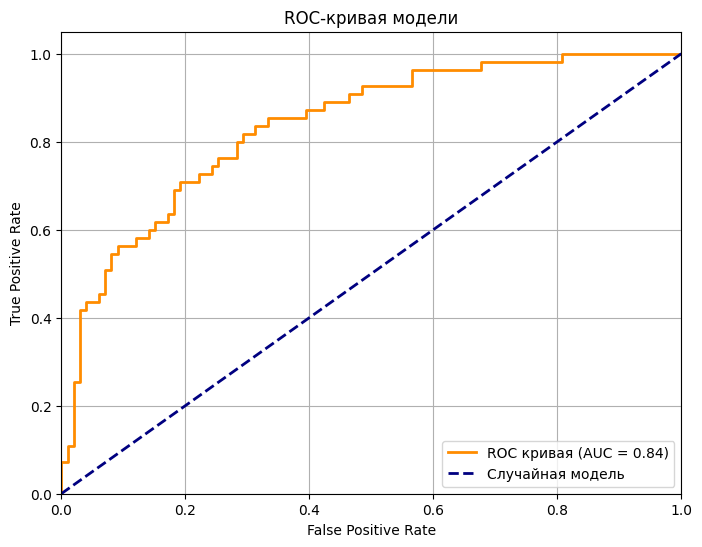

In [94]:
# 1. ROC-кривая
roc_auc = plot_roc_curve(y_test_numeric, y_pred_proba)

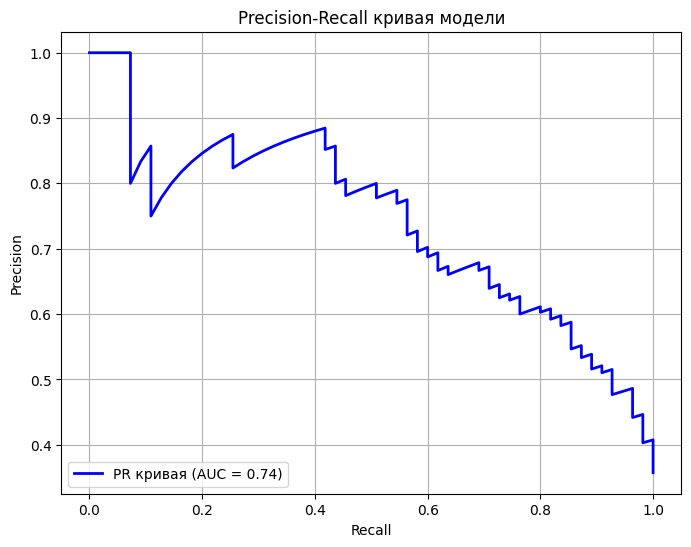

In [95]:
# 2. Precision-Recall кривая
pr_auc = plot_precision_recall_curve(y_test_numeric, y_pred_proba)

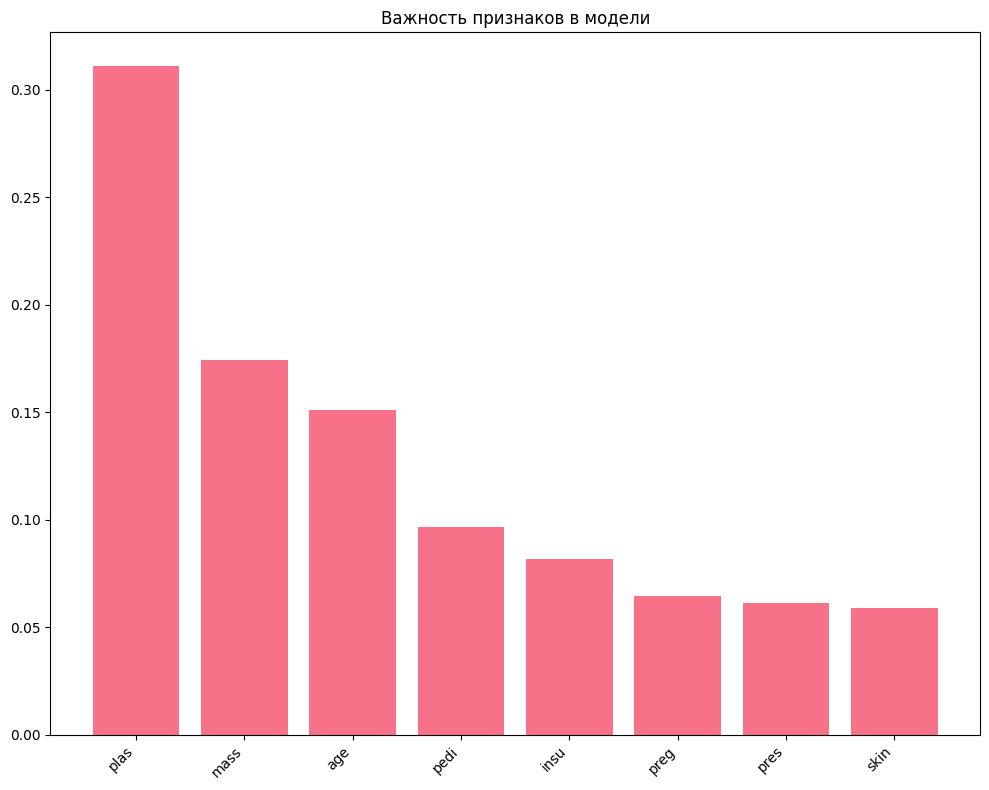


Важность признаков:
1. plas: 0.3113
2. mass: 0.1742
3. age: 0.1513
4. pedi: 0.0968
5. insu: 0.0819
6. preg: 0.0643
7. pres: 0.0612
8. skin: 0.0590


In [96]:
# 3. Важность признаков
feature_names = diabetes.feature_names
plot_feature_importance(model, feature_names)

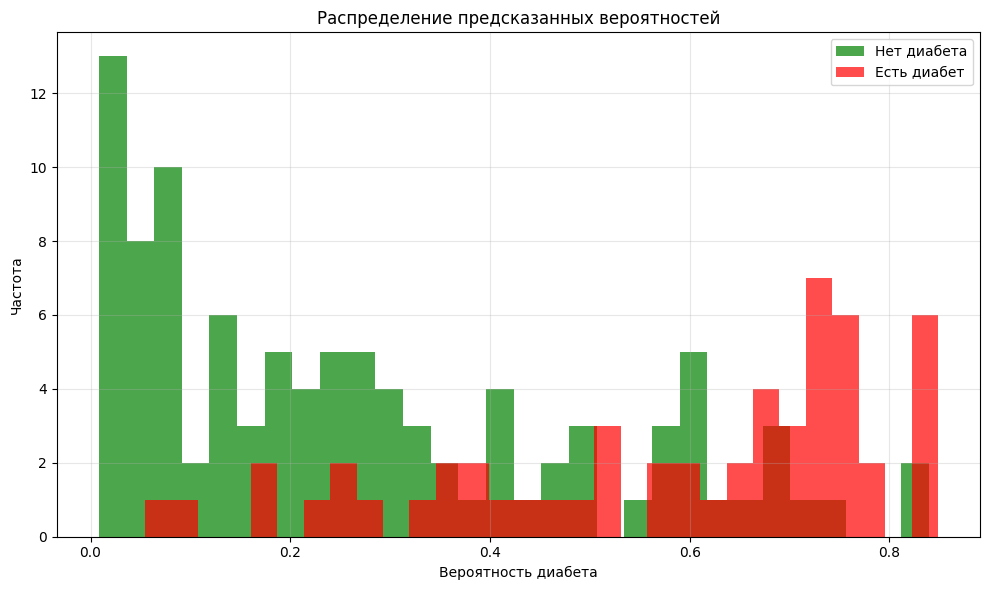

In [97]:
# 4. Распределение вероятностей
plot_probability_distribution(y_test_numeric, y_pred_proba)

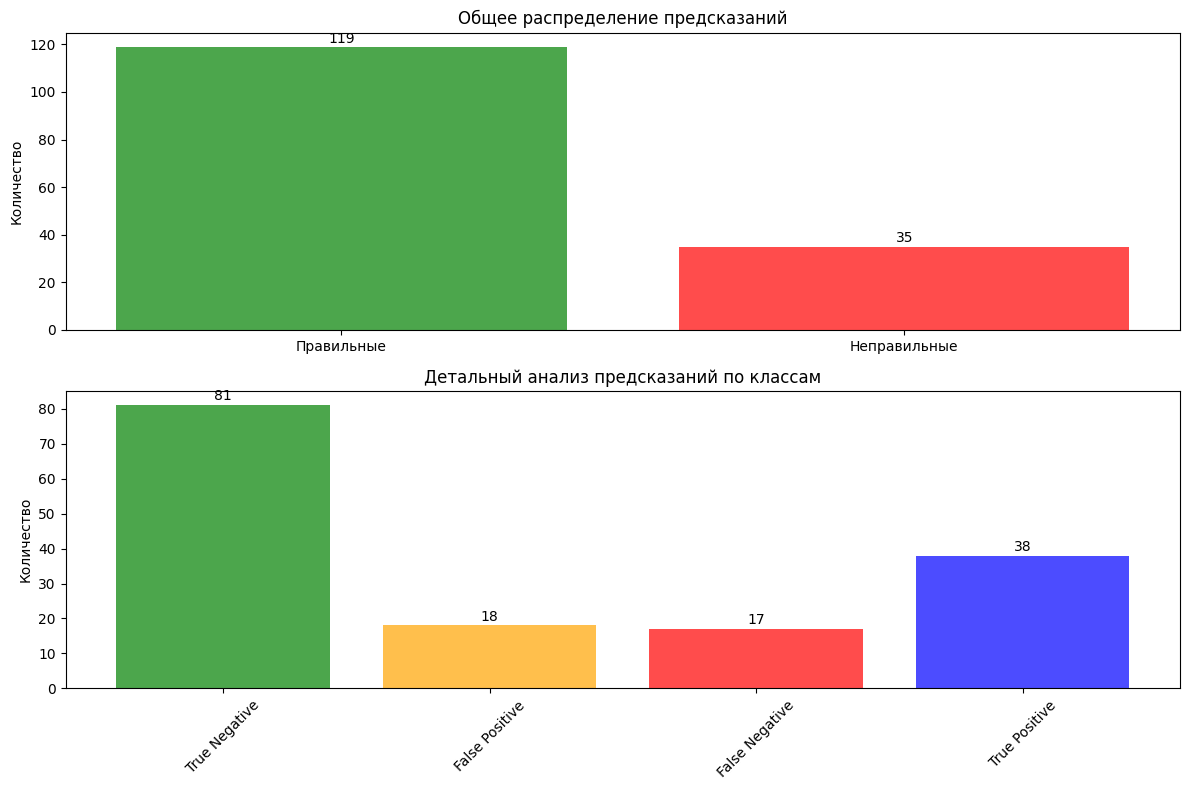


Детальные метрики:
True Negative (TN): 81
False Positive (FP): 18
False Negative (FN): 17
True Positive (TP): 38
Accuracy: 0.773
Precision: 0.679
Recall: 0.691
F1-Score: 0.685


In [98]:
# 5. Сравнение фактических и предсказанных значений
plot_prediction_analysis(y_test_numeric, y_pred_numeric)

Графики показывают хорошую точность модели, но для достижения лучшего результата необходим датасет с большим количеством объектов.

### Создание веб-программы

In [99]:
import gradio as gr
import joblib
import numpy as np

# Загружаем всё, что сохранили
model = joblib.load('diabetes_model.pkl')
imputer = joblib.load('imputer.pkl')
scaler = joblib.load('scaler.pkl')

# Функция для предсказания
def predict_diabetes(preg, plas, pres, skin, insu, mass, pedi, age):
    # Собираем ввод пользователя в массив
    input_data = np.array([[preg, plas, pres, skin, insu, mass, pedi, age]])

    # Применяем ту же предобработку, что и была
    input_imp = imputer.transform(input_data)
    input_scaled = scaler.transform(input_imp)

    # Делаем предсказание
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)

    # Возвращаем результат в понятном виде
    result = "Вероятность диабета высока" if prediction[0] == 1 else "Вероятность диабета низка"
    conf = f"Вероятность: {probability[0][1]*100:.2f}%"
    return f"{result}\n{conf}"

# Создаем интерфейс
inputs = [
    gr.Number(label="Количество беременностей"),
    gr.Number(label="Глюкоза (плазма)"),
    gr.Number(label="Давление"),
    gr.Number(label="Толщина кожи (мм)"),
    gr.Number(label="Инсулин (мкЕд/мл)"),
    gr.Number(label="Индекс массы тела"),
    gr.Number(label="Наследственность"),
    gr.Number(label="Возраст")
]

# Запускаем интерфейс
gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text", title="Предсказание риска диабета").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf6956ebe754fd9d10.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
